In [9]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from keras_core.utils import image_dataset_from_directory
from keras_core import optimizers
from keras_core.applications import ConvNeXtBase, ConvNeXtSmall, ConvNeXtTiny
from keras_core.layers import Dense, Dropout, BatchNormalization
from keras_core.models import Model, Sequential
from keras_core.callbacks import EarlyStopping
from keras_core import regularizers

In [4]:
crop_dir = "data/crop"

In [5]:
train = image_dataset_from_directory(crop_dir,
                                     labels="inferred",
                                     label_mode="categorical",
                                     validation_split = 0.2,
                                     subset = "training",
                                     shuffle = True,
                                     batch_size=32,
                                     seed = 42)

validation = image_dataset_from_directory(crop_dir,
                                          labels="inferred",
                                          label_mode="categorical",
                                          validation_split = 0.2,
                                          subset = "validation",
                                          shuffle = True,
                                          batch_size=32,                                         
                                          seed = 42)

Found 19270 files belonging to 43 classes.
Using 15416 files for training.
Found 19270 files belonging to 43 classes.
Using 3854 files for validation.


In [6]:
# convnext tiny model

# base_model = ConvNeXtTiny(model_name="convnext_tiny",
#                          include_top=False,
#                          include_preprocessing=True,
#                          weights="imagenet",
#                          input_tensor=None,
#                          input_shape=None,
#                          pooling="avg",
#                          classes=43,
#                          classifier_activation="softmax",
#                          )


In [7]:
# convnext small model

# base_model = ConvNeXtSmall(model_name="convnext_small",
#                           include_top=False,
#                           include_preprocessing=True,
#                           weights="imagenet",
#                           input_tensor=None,
#                           input_shape=None,
#                           pooling="avg",
#                           classes=43,
#                           classifier_activation="softmax",
#                           )


In [6]:
# convnext base model

base_model = ConvNeXtBase(model_name="convnext_base",
                         include_top=False,
                         include_preprocessing=True,
                         weights="imagenet",
                         input_tensor=None,
                         input_shape=None,
                         pooling="avg",
                         classes=43,
                         classifier_activation="softmax",
                         )


In [7]:
class_names = train.class_names

In [8]:
class_names

['A10',
 'A400M',
 'AG600',
 'AV8B',
 'B1',
 'B2',
 'B52',
 'Be200',
 'C130',
 'C17',
 'C2',
 'C5',
 'E2',
 'E7',
 'EF2000',
 'F117',
 'F14',
 'F15',
 'F16',
 'F18',
 'F22',
 'F35',
 'F4',
 'J20',
 'JAS39',
 'MQ9',
 'Mig31',
 'Mirage2000',
 'P3',
 'RQ4',
 'Rafale',
 'SR71',
 'Su34',
 'Su57',
 'Tornado',
 'Tu160',
 'Tu95',
 'U2',
 'US2',
 'V22',
 'Vulcan',
 'XB70',
 'YF23']

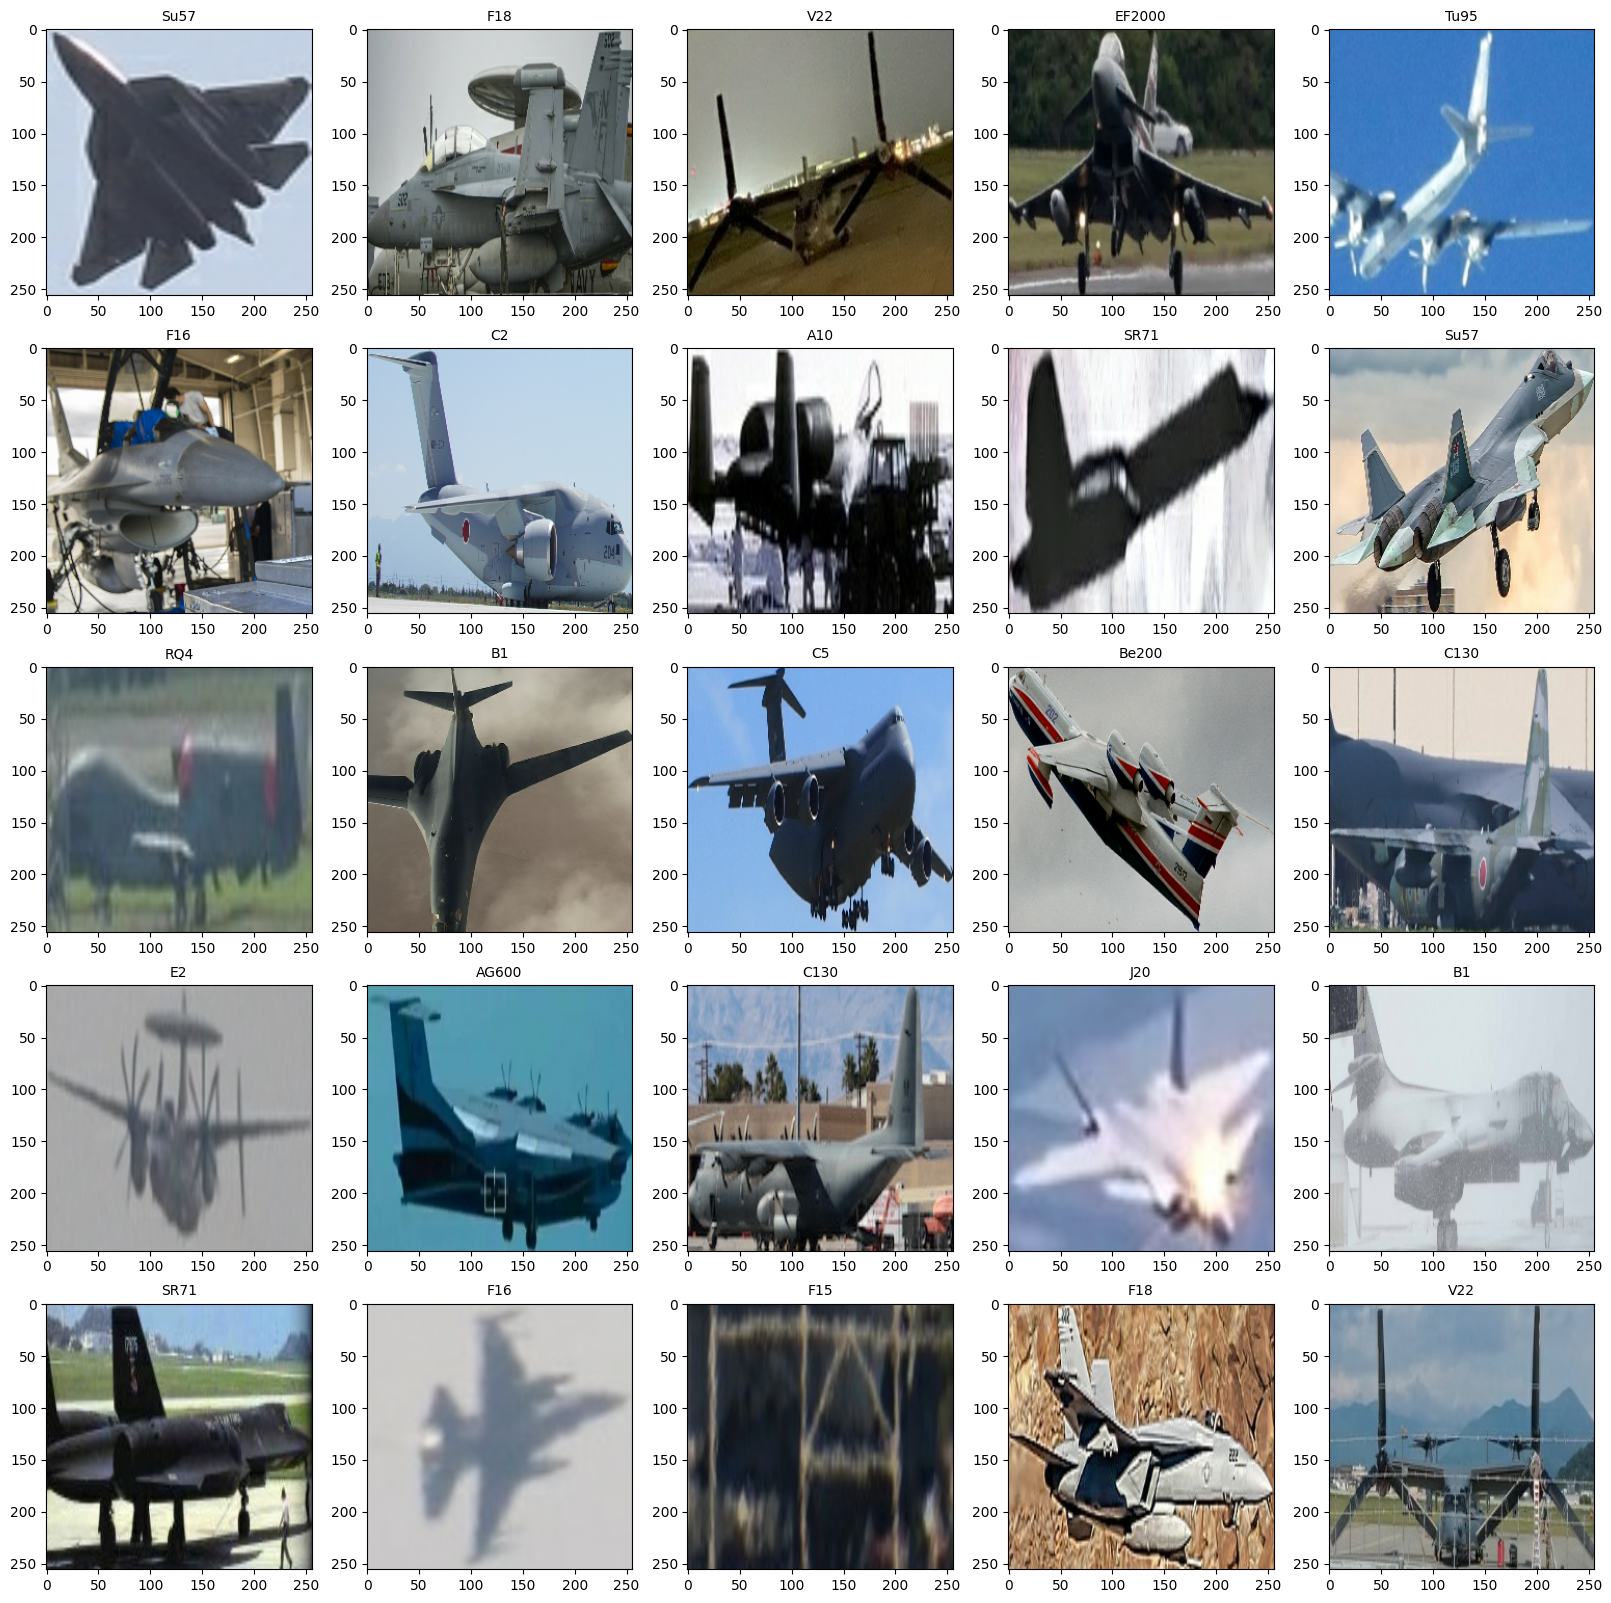

In [10]:
plt.figure(figsize = (20, 20))
for images, labels in train.take(1):
    for n in range(25):
        plt.subplot(5, 5, n + 1)
        image = images[n] / 255      
        plt.imshow(image)
        index = np.argmax(labels[n]) 
        class_name = class_names[index]   
        plt.title(class_name, fontsize= 10)

In [11]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions = Dense(43, activation='softmax')(x)

In [12]:
model = Model(inputs=base_model.input,
              outputs=predictions)

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
opt = optimizers.AdamW(learning_rate=0.001)

In [16]:
es = EarlyStopping(patience=10)

In [16]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │       0 │ -                    │
│ (InputLayer)        │ None, 3)          │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_pres… │ (None, None,      │       0 │ input_layer[0][0]    │
│ (Normalization)     │ None, 3)          │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stem  │ (None, None,      │   6,528 │ convnext_base_prest… │
│ (Sequential)        │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │   6,400 │ convnext_base_stem[… │
│ (Conv2D)            │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │     256 │ convnext_base_stage… │
│ (LayerNormalizatio… │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │  66,048 │ convnext_base_stage… │
│ (Dense)             │ None, 512)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │       0 │ convnext_base_stage… │
│ (Activation)        │ None, 512)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │  65,664 │ convnext_base_stage… │
│ (Dense)             │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │     128 │ convnext_base_stage… │
│ (LayerScale)        │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │       0 │ convnext_base_stage… │
│ (Activation)        │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ add (Add)           │ (None, None,      │       0 │ convnext_base_stem[… │
│                     │ None, 128)        │         │ convnext_base_stage… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │   6,400 │ add[0][0]            │
│ (Conv2D)            │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │     256 │ convnext_base_stage… │
│ (LayerNormalizatio… │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │  66,048 │ convnext_base_stage… │
│ (Dense)             │ None, 512)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │       0 │ convnext_base_stage… │
│ (Activation)        │ None, 512)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │  65,664 │ convnext_base_stage… │
│ (Dense)             │ None, 128)        │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ convnext_base_stag… │ (None, None,      │     128 │ convnext_base_stage

 Total params: 87,839,915 (335.08 MB)

 Trainable params: 273,451 (1.04 MB)

 Non-trainable params: 87,566,464 (334.04 MB)

In [18]:
history_1 = model.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 221s 450ms/step - accuracy: 0.3494 - loss: 2.3999 - val_accuracy: 0.6495 - val_loss: 1.2068
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 454ms/step - accuracy: 0.7259 - loss: 0.9316 - val_accuracy: 0.7115 - val_loss: 0.9858
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 220s 455ms/step - accuracy: 0.8218 - loss: 0.6056 - val_accuracy: 0.7423 - val_loss: 0.9070
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 455ms/step - accuracy: 0.8758 - loss: 0.4132 - val_accuracy: 0.7426 - val_loss: 0.9203
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 455ms/step - accuracy: 0.9161 - loss: 0.2934 - val_accuracy: 0.7740 - val_loss: 0.8676
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 454ms/step - accuracy: 0.9342 - loss: 0.2341 - val_accuracy: 0.7872 - val_loss: 0.8535
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 455ms/step - accuracy: 0.9556 - loss: 0.1596 - val_accuracy: 0.7732 - val_loss: 0.9059
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 454ms/step - accuracy: 

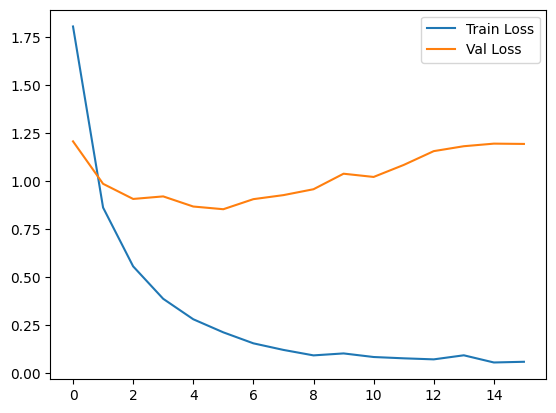

In [19]:
plt.plot(history_1.history["loss"], label="Train Loss")
plt.plot(history_1.history["val_loss"], label="Val Loss")
plt.legend()

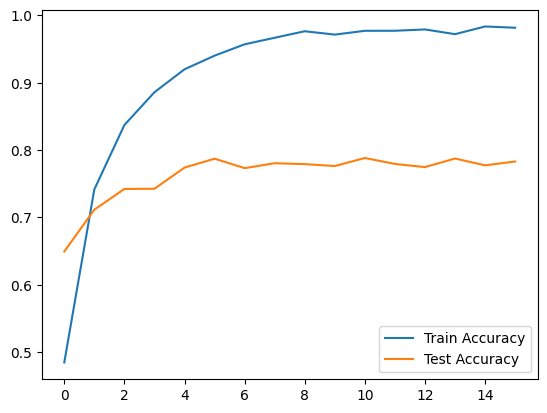

In [20]:
plt.plot(history_1.history["accuracy"], label="Train Accuracy")
plt.plot(history_1.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [21]:
model.save("ac_ident_model_adamw.keras")

# Second Model

In [22]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_2 = Dense(43, activation='softmax')(x)

In [23]:
model_2 = Model(inputs=base_model.input,
                outputs=predictions_2)

In [24]:
opt_2 = optimizers.RMSprop(learning_rate=0.001)

In [25]:
model_2.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_2 = model_2.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.3491 - loss: 2.3924 - val_accuracy: 0.6295 - val_loss: 1.2489
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 450ms/step - accuracy: 0.7036 - loss: 0.9792 - val_accuracy: 0.7042 - val_loss: 1.0284
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 220s 457ms/step - accuracy: 0.7988 - loss: 0.6414 - val_accuracy: 0.6879 - val_loss: 1.0963
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 220s 456ms/step - accuracy: 0.8589 - loss: 0.4433 - val_accuracy: 0.7413 - val_loss: 0.9640
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 455ms/step - accuracy: 0.8979 - loss: 0.3223 - val_accuracy: 0.7449 - val_loss: 1.0040
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 222s 460ms/step - accuracy: 0.9227 - loss: 0.2496 - val_accuracy: 0.7356 - val_loss: 1.1233
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 221s 458ms/step - accuracy: 0.9385 - loss: 0.1914 - val_accuracy: 0.7810 - val_loss: 0.9827
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 455ms/step - accuracy: 

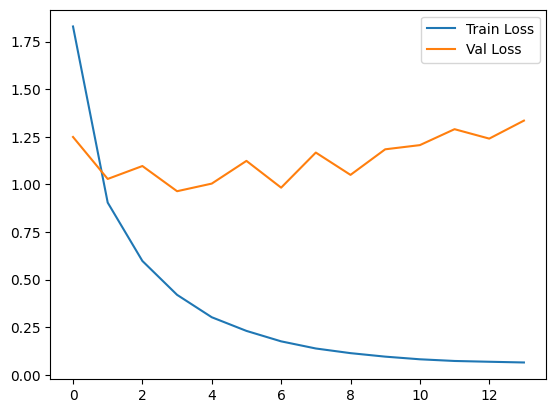

In [27]:
plt.plot(history_2.history["loss"], label="Train Loss")
plt.plot(history_2.history["val_loss"], label="Val Loss")
plt.legend()

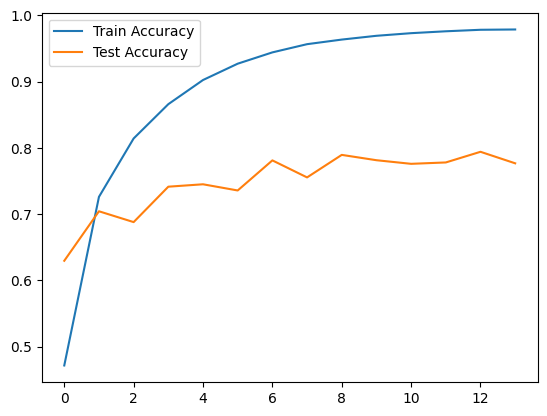

In [28]:
plt.plot(history_2.history["accuracy"], label="Train Accuracy")
plt.plot(history_2.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [29]:
model.save("ac_ident_model_rmsprop.keras")

# Third Model

In [30]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_3 = Dense(43, activation='softmax')(x)

In [31]:
model_3 = Model(inputs=base_model.input,
                outputs=predictions_3)

In [32]:
opt_3 = optimizers.Adam(learning_rate=0.001)

In [33]:
model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history_3 = model_3.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.3531 - loss: 2.3662 - val_accuracy: 0.6526 - val_loss: 1.1727
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 450ms/step - accuracy: 0.7251 - loss: 0.9403 - val_accuracy: 0.7034 - val_loss: 0.9966
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 451ms/step - accuracy: 0.8186 - loss: 0.6150 - val_accuracy: 0.7473 - val_loss: 0.8634
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 450ms/step - accuracy: 0.8739 - loss: 0.4316 - val_accuracy: 0.7540 - val_loss: 0.8608
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 450ms/step - accuracy: 0.9123 - loss: 0.3119 - val_accuracy: 0.7556 - val_loss: 0.8778
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 451ms/step - accuracy: 0.9371 - loss: 0.2307 - val_accuracy: 0.7628 - val_loss: 0.8651
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 451ms/step - accuracy: 0.9484 - loss: 0.1746 - val_accuracy: 0.7774 - val_loss: 0.8645
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 451ms/step - accuracy: 

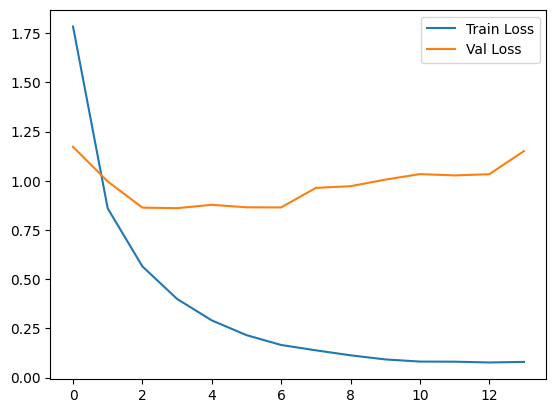

In [35]:
plt.plot(history_3.history["loss"], label="Train Loss")
plt.plot(history_3.history["val_loss"], label="Val Loss")
plt.legend()

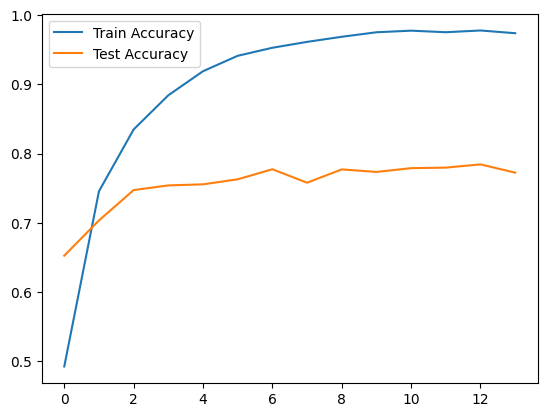

In [36]:
plt.plot(history_3.history["accuracy"], label="Train Accuracy")
plt.plot(history_3.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [37]:
model.save("ac_ident_model_adam.keras")

# Fourth Model

In [38]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_4 = Dense(43, activation='softmax')(x)

In [39]:
model_4 = Model(inputs=base_model.input,
                outputs=predictions_4)

In [40]:
opt_4 = optimizers.Adamax(learning_rate=0.001)

In [41]:
model_4.compile(optimizer=opt_4, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history_4 = model_4.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 219s 453ms/step - accuracy: 0.2922 - loss: 2.6466 - val_accuracy: 0.5807 - val_loss: 1.4610
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.6571 - loss: 1.2197 - val_accuracy: 0.6746 - val_loss: 1.1222
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.7631 - loss: 0.8600 - val_accuracy: 0.7198 - val_loss: 0.9747
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.8165 - loss: 0.6650 - val_accuracy: 0.7436 - val_loss: 0.9070
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.8689 - loss: 0.5202 - val_accuracy: 0.7693 - val_loss: 0.8268
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 0.8959 - loss: 0.4197 - val_accuracy: 0.7807 - val_loss: 0.7904
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 451ms/step - accuracy: 0.9209 - loss: 0.3448 - val_accuracy: 0.7852 - val_loss: 0.7762
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 452ms/step - accuracy: 

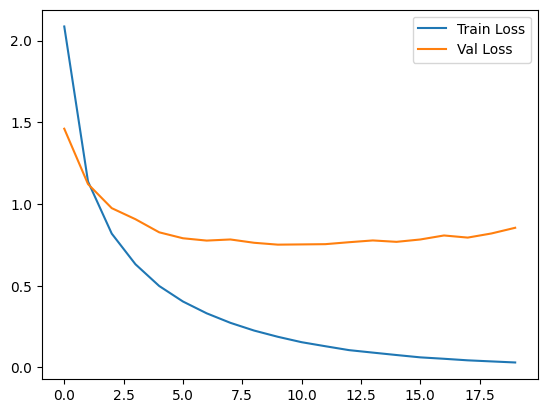

In [43]:
plt.plot(history_4.history["loss"], label="Train Loss")
plt.plot(history_4.history["val_loss"], label="Val Loss")
plt.legend()

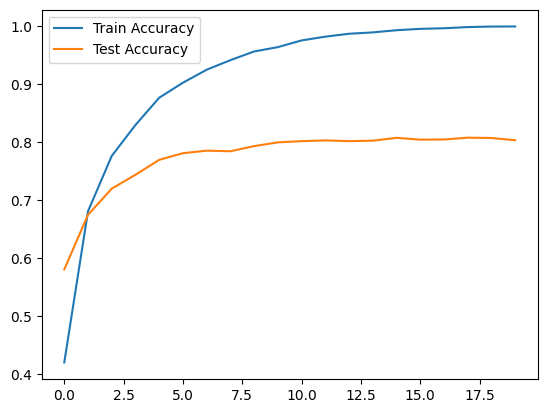

In [44]:
plt.plot(history_4.history["accuracy"], label="Train Accuracy")
plt.plot(history_4.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [45]:
model.save("ac_ident_model_adamax.keras")

# Fifth Model

In [46]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_5 = Dense(43, activation='softmax')(x)

In [47]:
model_5 = Model(inputs=base_model.input,
                outputs=predictions_5)

In [48]:
opt_5 = optimizers.SGD(learning_rate=0.001)

In [49]:
model_5.compile(optimizer=opt_5, loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history_5 = model_5.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 218s 451ms/step - accuracy: 0.0579 - loss: 3.8565 - val_accuracy: 0.1344 - val_loss: 3.4203
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 216s 448ms/step - accuracy: 0.1492 - loss: 3.3294 - val_accuracy: 0.2076 - val_loss: 3.1135
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 216s 448ms/step - accuracy: 0.2141 - loss: 3.0428 - val_accuracy: 0.2553 - val_loss: 2.8831
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 449ms/step - accuracy: 0.2571 - loss: 2.8285 - val_accuracy: 0.2919 - val_loss: 2.7034
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 216s 448ms/step - accuracy: 0.2934 - loss: 2.6474 - val_accuracy: 0.3197 - val_loss: 2.5523
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 449ms/step - accuracy: 0.3235 - loss: 2.5030 - val_accuracy: 0.3454 - val_loss: 2.4275
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 450ms/step - accuracy: 0.3505 - loss: 2.3729 - val_accuracy: 0.3703 - val_loss: 2.3251
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 217s 450ms/step - accuracy: 

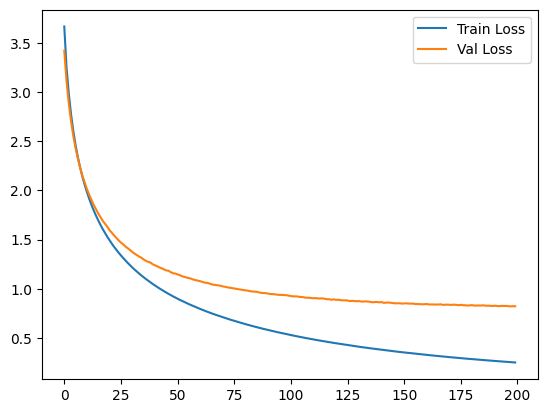

In [51]:
plt.plot(history_5.history["loss"], label="Train Loss")
plt.plot(history_5.history["val_loss"], label="Val Loss")
plt.legend()

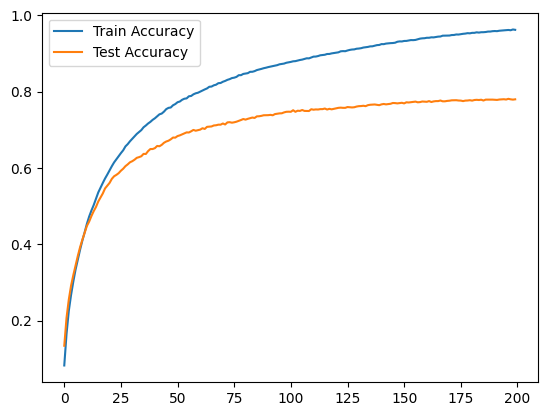

In [52]:
plt.plot(history_5.history["accuracy"], label="Train Accuracy")
plt.plot(history_5.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [53]:
model.save("ac_ident_model_sgd.keras")

# Sixth Model

In [22]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_6 = Dense(43, activation='softmax')(x)

In [23]:
model_6 = Model(inputs=base_model.input,
                outputs=predictions_6)

In [24]:
opt_6 = optimizers.Adadelta(learning_rate=1.0)

In [25]:
model_6.compile(optimizer=opt_6, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_6 = model_6.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 227s 470ms/step - accuracy: 0.0602 - loss: 3.7706 - val_accuracy: 0.0485 - val_loss: 3.6147
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 228s 472ms/step - accuracy: 0.1478 - loss: 3.2445 - val_accuracy: 0.7211 - val_loss: 0.9828
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 227s 471ms/step - accuracy: 0.7871 - loss: 0.7296 - val_accuracy: 0.8482 - val_loss: 0.5479
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 226s 469ms/step - accuracy: 0.9260 - loss: 0.2384 - val_accuracy: 0.8583 - val_loss: 0.5244
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 227s 471ms/step - accuracy: 0.9560 - loss: 0.1475 - val_accuracy: 0.8768 - val_loss: 0.5455
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 227s 471ms/step - accuracy: 0.9694 - loss: 0.1023 - val_accuracy: 0.8757 - val_loss: 0.5572
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 228s 472ms/step - accuracy: 0.9834 - loss: 0.0561 - val_accuracy: 0.8895 - val_loss: 0.4843
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 229s 475ms/step - accuracy: 

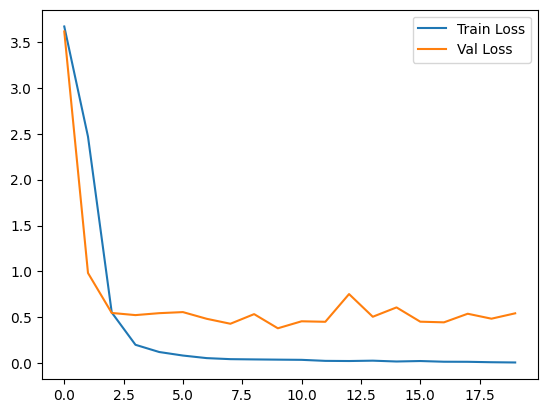

In [27]:
plt.plot(history_6.history["loss"], label="Train Loss")
plt.plot(history_6.history["val_loss"], label="Val Loss")
plt.legend()

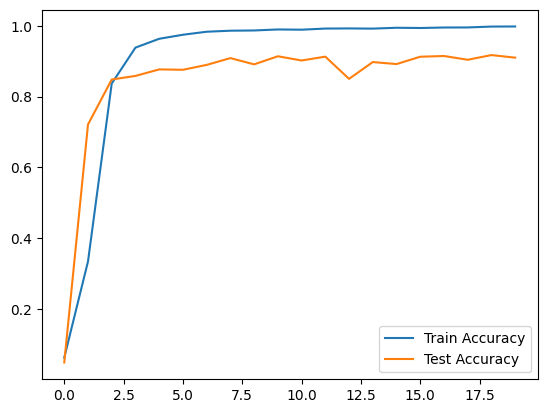

In [28]:
plt.plot(history_6.history["accuracy"], label="Train Accuracy")
plt.plot(history_6.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [30]:
model_6.save("ac_ident_model_adadelta.keras")

# Seventh Model

In [31]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_7 = Dense(43, activation='softmax')(x)

In [32]:
model_7 = Model(inputs=base_model.input,
                outputs=predictions_7)

In [33]:
opt_7 = optimizers.Adagrad(learning_rate=1.0)

In [34]:
model_7.compile(optimizer=opt_7, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history_7 = model_7.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 228s 471ms/step - accuracy: 0.0340 - loss: 15.3758 - val_accuracy: 0.0384 - val_loss: 15.5020
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 225s 466ms/step - accuracy: 0.0363 - loss: 15.5327 - val_accuracy: 0.0384 - val_loss: 15.4913
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 229s 474ms/step - accuracy: 0.0363 - loss: 15.5336 - val_accuracy: 0.0384 - val_loss: 15.5020
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 227s 470ms/step - accuracy: 0.0366 - loss: 15.5276 - val_accuracy: 0.0384 - val_loss: 15.4913
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 228s 474ms/step - accuracy: 0.0356 - loss: 15.5451 - val_accuracy: 0.0384 - val_loss: 15.5020
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 227s 470ms/step - accuracy: 0.0360 - loss: 15.5372 - val_accuracy: 0.0384 - val_loss: 15.4966
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 228s 473ms/step - accuracy: 0.0363 - loss: 15.5334 - val_accuracy: 0.0384 - val_loss: 15.4966
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 222s 461ms/ste

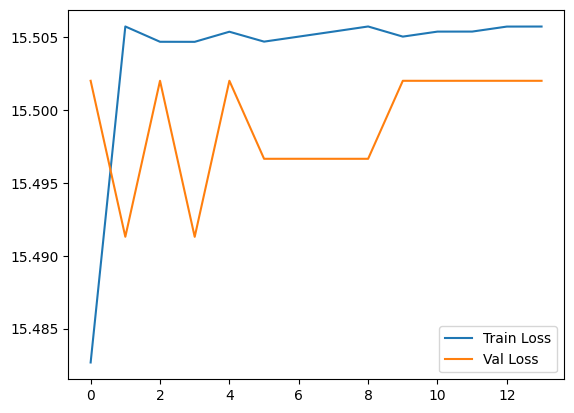

In [36]:
plt.plot(history_7.history["loss"], label="Train Loss")
plt.plot(history_7.history["val_loss"], label="Val Loss")
plt.legend()

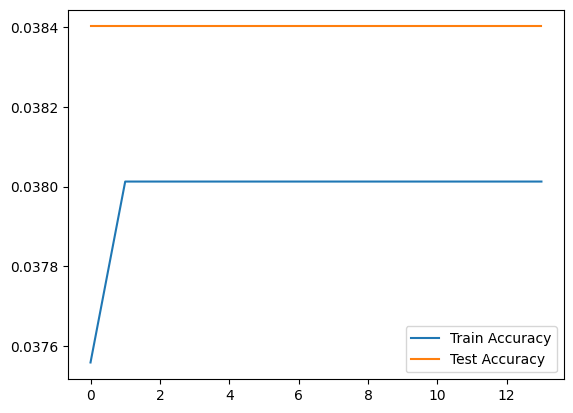

In [37]:
plt.plot(history_7.history["accuracy"], label="Train Accuracy")
plt.plot(history_7.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [38]:
model_7.save("ac_ident_model_adagrad.keras")

# Eighth Model

In [44]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_8 = Dense(43, activation='softmax')(x)

In [45]:
model_8 = Model(inputs=base_model.input,
                outputs=predictions_8)

In [46]:
opt_8 = optimizers.Nadam(learning_rate=0.001)

In [47]:
model_8.compile(optimizer=opt_8, loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history_8 = model_8.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 229s 474ms/step - accuracy: 0.0594 - loss: 3.6705 - val_accuracy: 0.0553 - val_loss: 3.6268
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 231s 478ms/step - accuracy: 0.0633 - loss: 3.6280 - val_accuracy: 0.0553 - val_loss: 3.6140
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 230s 476ms/step - accuracy: 0.0636 - loss: 3.6187 - val_accuracy: 0.0553 - val_loss: 3.6062
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 230s 477ms/step - accuracy: 0.0633 - loss: 3.6043 - val_accuracy: 0.0581 - val_loss: 3.5700
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 230s 477ms/step - accuracy: 0.0690 - loss: 3.5756 - val_accuracy: 0.0654 - val_loss: 3.5527
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 231s 480ms/step - accuracy: 0.0685 - loss: 3.5565 - val_accuracy: 0.0669 - val_loss: 3.5311
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 231s 479ms/step - accuracy: 0.0713 - loss: 3.5335 - val_accuracy: 0.0763 - val_loss: 3.5158
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 231s 479ms/step - accuracy: 

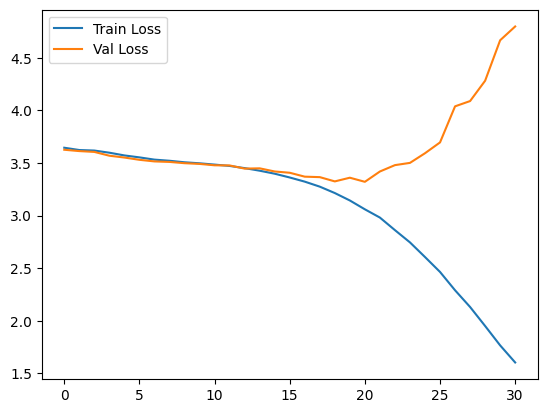

In [49]:
plt.plot(history_8.history["loss"], label="Train Loss")
plt.plot(history_8.history["val_loss"], label="Val Loss")
plt.legend()

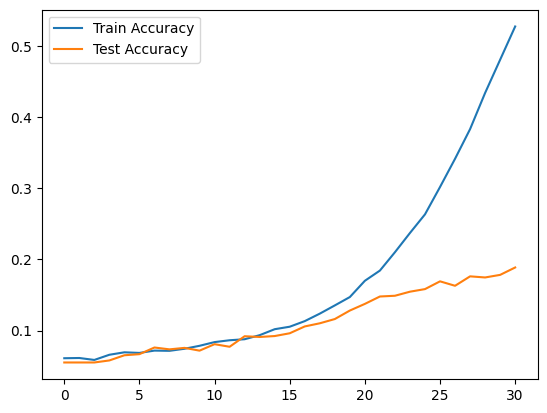

In [50]:
plt.plot(history_8.history["accuracy"], label="Train Accuracy")
plt.plot(history_8.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [51]:
model_8.save("ac_ident_model_nadam.keras")

# Ninth Model

In [52]:
x = base_model.output

x = Dense(256, activation="relu")(x)

predictions_9 = Dense(43, activation='softmax')(x)

In [53]:
model_9 = Model(inputs=base_model.input,
                outputs=predictions_9)

In [54]:
opt_9 = optimizers.Ftrl(learning_rate=0.001, l2_regularization_strength=0.15)

In [55]:
model_9.compile(optimizer=opt_9, loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history_9 = model_9.fit(train, validation_data=validation, epochs=200, callbacks=[es], verbose=1)

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 336s 697ms/step - accuracy: 0.0594 - loss: 3.7609 - val_accuracy: 0.0579 - val_loss: 3.7553
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 695ms/step - accuracy: 0.0619 - loss: 3.7544 - val_accuracy: 0.0579 - val_loss: 3.7519
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 694ms/step - accuracy: 0.0629 - loss: 3.7512 - val_accuracy: 0.0579 - val_loss: 3.7492
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 695ms/step - accuracy: 0.0625 - loss: 3.7486 - val_accuracy: 0.0579 - val_loss: 3.7467
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 695ms/step - accuracy: 0.0583 - loss: 3.7461 - val_accuracy: 0.0553 - val_loss: 3.7436
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 694ms/step - accuracy: 0.0617 - loss: 3.7426 - val_accuracy: 0.0553 - val_loss: 3.7383
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 694ms/step - accuracy: 0.0631 - loss: 3.7357 - val_accuracy: 0.0553 - val_loss: 3.7238
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 335s 694ms/step - accuracy: 

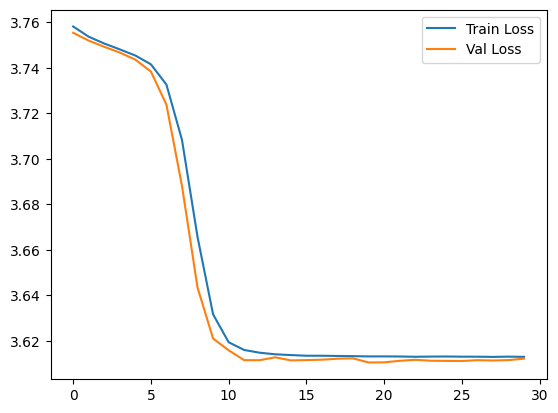

In [57]:
plt.plot(history_9.history["loss"], label="Train Loss")
plt.plot(history_9.history["val_loss"], label="Val Loss")
plt.legend()

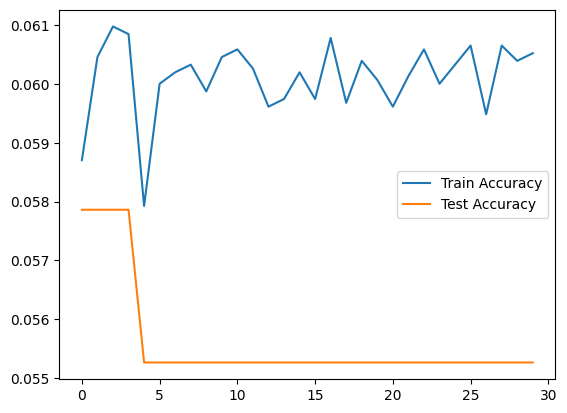

In [58]:
plt.plot(history_9.history["accuracy"], label="Train Accuracy")
plt.plot(history_9.history["val_accuracy"], label="Test Accuracy")
plt.legend()

In [59]:
model_9.save("ac_ident_model_Ftrl.keras")

# Results

| Model        | Optimiser | Train Acc | Train Loss | Val Acc | Val Loss |Fit time     |
|--------------|-----------|-----------|------------|---------|----------|-------------|
|ConvNext Base |AdamW      |0.9811     |0.0647      |0.7831   |1.1933    |58m 29s      |
|ConvNext Base |RMSProp    |0.9760     |0.0702      |0.7766   |1.3348    |51m 11s      |
|ConvNext Base |Adam       |0.9761     |0.0743      |0.7724   |1.1510    |50m 41s      |
|ConvNext Base |Adamax     |0.9981     |0.0330      |0.8031   |0.8546    |1hr 12m 39s  |
|ConvNext Base |SGD        |0.9620     |0.2507      |0.7802   |0.8217    |12hr 17m 2s  |
|ConvNext Base |Adadelta   |0.9978     |0.0091      |0.9100   |0.5438    |76m 13s      |
|ConvNext Base |Adagrad    |0.0362     |15.5349     |0.0384   |15.5020   |52m 52s      |
|ConvNext Base |Nadam      |0.5144     |1.6397      |0.1886   |4.7987    |1hr 59m 7s   |
|ConvNext Base |Ftrl       |0.0619     |3.6134      |0.0553   |3.6123    |2hr 47m 16s  | 